# Melbourne Housing Project
Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guidelines as
#### [0. Handling missing values and exploring data(Data Cleaning)](#cau0)
#### [1. Examine and explore data (visualization, interactions among features)](#cau1)
#### [1,5. Create Linear Regession model](#cau1.5)
#### [2. Apply the model for prediction with holdout and cross validation](#cau2)
#### [3. Using PCA, apply the model with holdout and cross validation](#cau3)
#### [4. Visualize the residue and homoscedasticity](#cau4)
#### [5. Tune the model if necessary](#cau5)
#### [6. Write up analysis for each section (For example: explain why the model is overfitting, explain why applying PCA is better, etc.)](#cau6)
#### [Include conclusions for summary](#cau7)

In [110]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import seaborn as sns 
import matplotlib.pyplot as plt

import datetime
import time

In [111]:
df=pd.read_csv('C:/Users/Admin/Desktop/week4/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

<a id='cau0'></a>
# Handling missing values and exploring data(Data Cleaning)

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [113]:
df.shape


(34857, 21)

Dữ liệu gôm 21 cột và 34857 hàng

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Dữ liệu bao gồm 13 kiểu dư liệu thực và 8 kiểu object.
Có Rất nhiều cột thiếu dữ liệu như Price, bathroom,bedroom2...
Ta đi xử lý Missing value và Outliers

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Từ bảng thống kê và biểu đồ Boxplot để kiểm tra Outliers

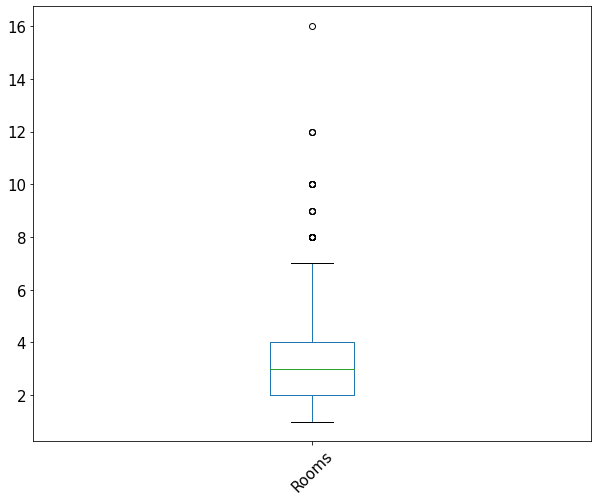

In [116]:
df[['Rooms']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);





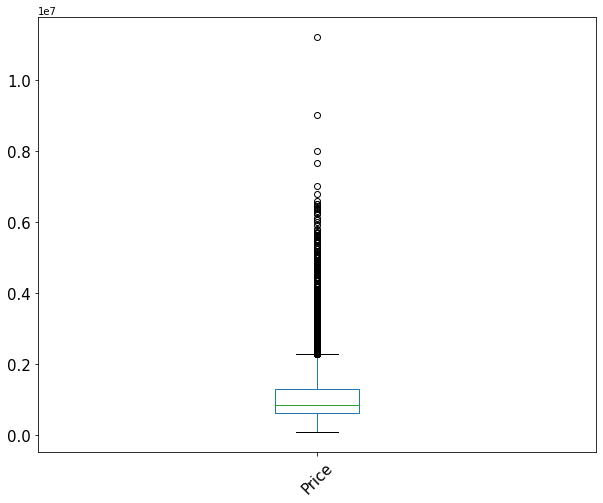

In [117]:
df[['Price']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

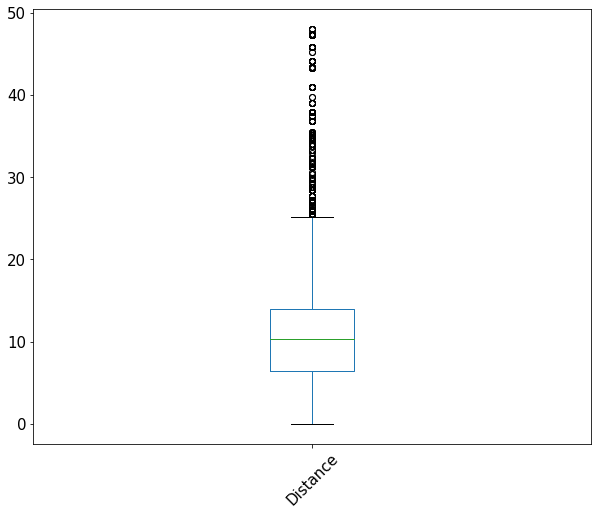

In [118]:
df[['Distance']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

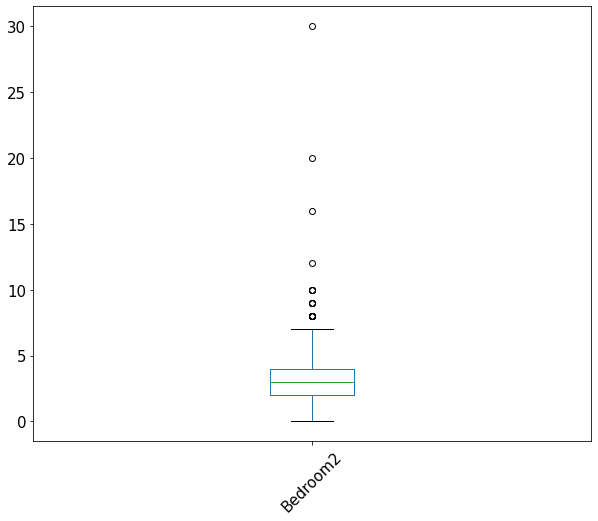

In [119]:
df[['Bedroom2']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45)

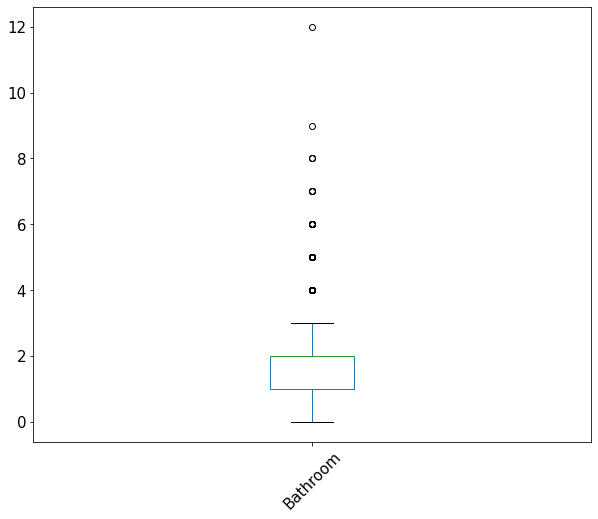

In [120]:
df[['Bathroom']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

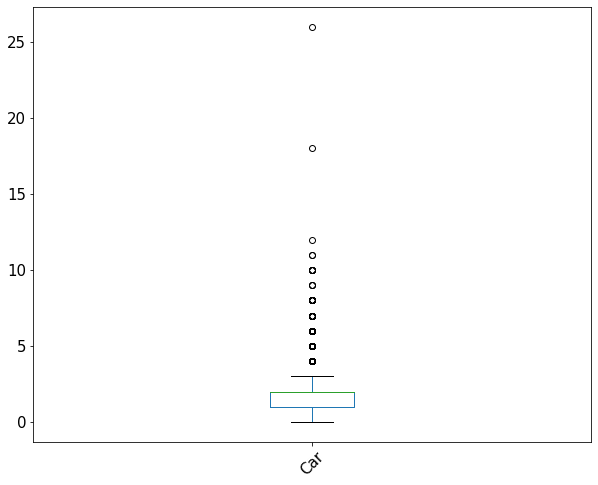

In [121]:
df[['Car']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

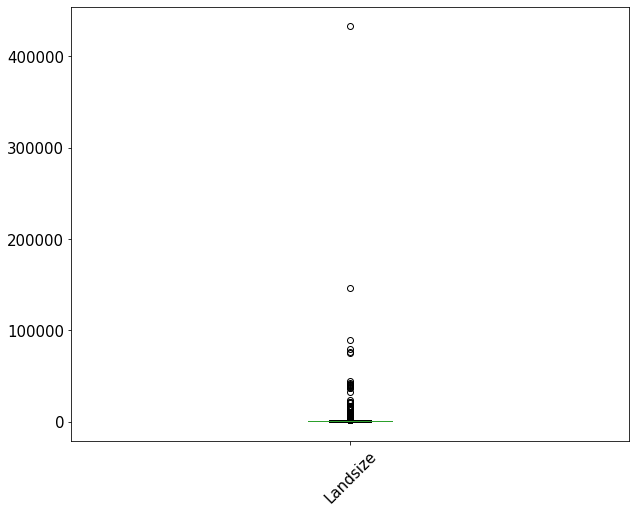

In [122]:
df[['Landsize']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

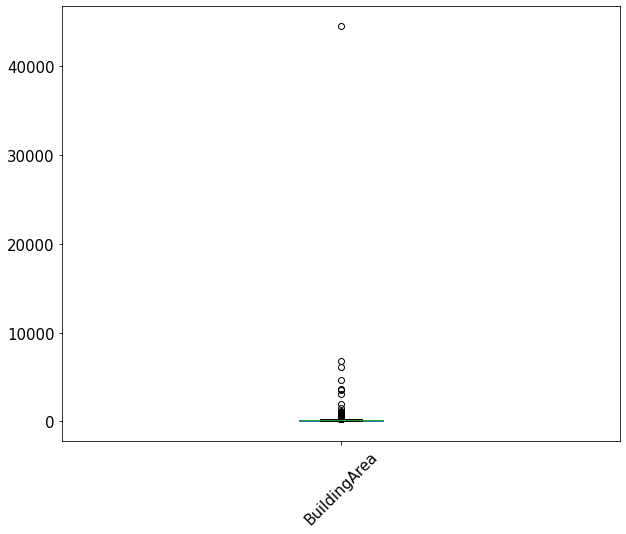

In [123]:
df[['BuildingArea']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

Từ biểu đồ ta có các feature có outliers.
    Rooms (4) = 12,16.
    Price (1) = 11200000.
    Bedroom2 (4)= 12,16,20,30.
    Bathroom (3) = 12,9,8.
    Car (2) = 26, 18
    Landsize(2) =  146699, 433014 .
    BuildingArea = 44515.

Sau khi xác định dựa trên biểu đồ và kiểm tra lại dữ liệu ta bắt đầu xóa các outliers

In [124]:
df.loc[df['Rooms'] > 10]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8309,Preston,12 Lyonsville Av,12,h,NaN,SN,Barry,28/08/2016,8.8,3072.0,...,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,14577.0
12959,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,20/05/2017,4.6,3122.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,-37.83030,145.03670,Southern Metropolitan,11308.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,...,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0
27150,Melton,213 Station Rd,12,h,710000.0,S,PRDNationwide,11/11/2017,31.7,3337.0,...,5.0,3.0,960.0,223.0,1970.0,Melton City Council,-37.68830,144.57760,Western Victoria,3600.0


In [125]:
outliers1 = np.where(df['Rooms'] > 10)
outliers1

(array([ 8309, 12959, 26210, 27150], dtype=int64),)

In [126]:
df = df.drop(df.index[outliers1])

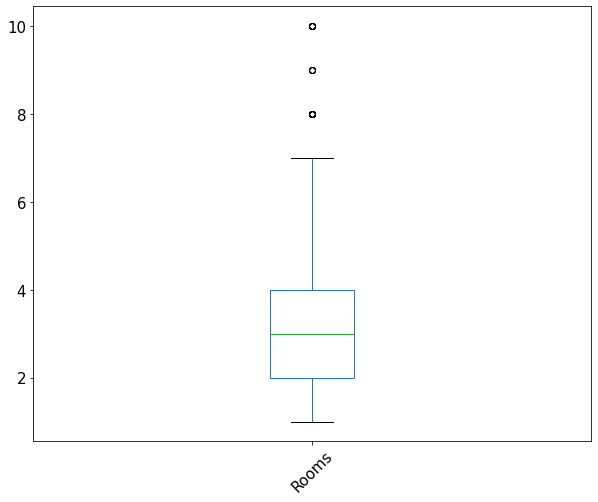

In [127]:
df[['Rooms']].boxplot(figsize=(10, 8), 
                    fontsize=15, 
                    grid=False, rot=45);

Biều đồ cho thấy số phòng hợp lý hơn.


In [128]:
df.loc[df['Price'] > 10000000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,10.5,3186.0,...,3.0,2.0,1400.0,NaN,NaN,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0


In [129]:
df.drop(df[df['Price'] == 11200000].index,inplace=True)

In [130]:
df.loc[df['Bedroom2'] > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.8530,145.1129,Southern Metropolitan,5678.0
12043,Caulfield East,5 Grange Rd,3,h,1650000.0,PI,Woodards,6/08/2016,9.3,3145.0,...,1.0,2.0,875.0,NaN,NaN,Glen Eira City Council,-37.8815,145.0491,Southern Metropolitan,608.0


In [131]:
df.drop(df[df['Bedroom2'] >= 20].index,inplace=True)

In [132]:
df.loc[df['Bathroom'] > 9]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [133]:
df.drop(df[df['Bathroom'] >= 9].index,inplace=True)

In [134]:
df.loc[df['Car'] > 12]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6017,Kew,25 Duke St,2,h,NaN,S,Kay,24/09/2016,5.6,3101.0,...,2.0,26.0,267.0,500.0,2011.0,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0
25839,Croydon,26 Railway Cr,2,h,1105000.0,SP,iTRAK,28/10/2017,23.0,3136.0,...,1.0,18.0,1250.0,NaN,NaN,Maroondah City Council,-37.79097,145.28695,Eastern Metropolitan,11925.0


In [135]:
df.drop(df[df['Car'] >= 12].index,inplace=True)

In [136]:
df.loc[df['Landsize'] > 100000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,3.0,1.0,433014.0,NaN,NaN,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
26868,Bullengarook,65 Webb Rd,4,h,1050000.0,PI,Raine,11/11/2017,45.9,3437.0,...,2.0,1.0,146699.0,NaN,NaN,Macedon Ranges Shire Council,-37.47540,144.51300,Northern Victoria,249.0


In [137]:
df.drop(df[df['Landsize'] >= 10000].index,inplace=True)

In [138]:
df.loc[df['BuildingArea'] > 10000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [139]:
df.drop(df[df['BuildingArea'] == 44515].index,inplace=True)

In [140]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34799.000000,2.720400e+04,34798.000000,34798.000000,26584.000000,26575.000000,26075.000000,22992.000000,13718.000000,15518.000000,26824.000000,26824.000000,34796.000000
mean,3.029800,1.049555e+06,11.174662,3115.879677,3.082192,1.623217,1.725791,514.811587,156.957133,1965.226898,-37.810760,145.001949,7574.381308
std,0.963052,6.379001e+05,6.758026,108.693608,0.955218,0.718491,0.988843,545.798501,133.524309,37.322036,0.090102,0.119839,4425.854752
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.863003,144.933517,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,520.000000,136.000000,1970.000000,-37.807700,145.007900,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,669.000000,187.000000,2000.000000,-37.754100,145.071925,10412.000000
max,10.000000,9.000000e+06,48.100000,3978.000000,10.000000,8.000000,11.000000,9900.000000,6791.000000,2106.000000,-37.395100,145.526350,21650.000000


Sau khi kiểm tra lại dữ liệu ta thấy số liệu tương đối.

## Handling missing values

In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34799 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34799 non-null object
Address          34799 non-null object
Rooms            34799 non-null int64
Type             34799 non-null object
Price            27204 non-null float64
Method           34799 non-null object
SellerG          34799 non-null object
Date             34799 non-null object
Distance         34798 non-null float64
Postcode         34798 non-null float64
Bedroom2         26584 non-null float64
Bathroom         26575 non-null float64
Car              26075 non-null float64
Landsize         22992 non-null float64
BuildingArea     13718 non-null float64
YearBuilt        15518 non-null float64
CouncilArea      34796 non-null object
Lattitude        26824 non-null float64
Longtitude       26824 non-null float64
Regionname       34796 non-null object
Propertycount    34796 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.8+ M

In [142]:
column_names = df.columns
column_names

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [143]:
column_names.is_unique

True

In [144]:
df.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [145]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7595
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8215
Bathroom          8224
Car               8724
Landsize         11807
BuildingArea     21081
YearBuilt        19281
CouncilArea          3
Lattitude         7975
Longtitude        7975
Regionname           3
Propertycount        3
dtype: int64

Ta có các missing value như : Price, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuild,..
Ta tiến hành xử lý các missing value :
Số lượng 10%: xóa cột 
số lượng trên 20% : imputed


In [146]:
df.Price.isnull().sum()


7595

Ta xét đến Taget : Price  có 7595 missing value 

In [147]:
7610/34857*100


21.83205668875692

Ta thấy trên dữ liệu mssing value >20% nên imputed nhưng vì là giá trị cần dự đoán nên ta xóa các cột của nó.
Xóa luôn các cột Postcode,CouncilArea,Regionname,Propertycount vì dữ liệu missing value <10%.

In [148]:
df.drop(df[df.Price.isnull()].index, inplace=True)
df.drop(df[df.Postcode.isnull()].index, inplace=True)
df.drop(df[df.CouncilArea.isnull()].index, inplace=True)
df.drop(df[df.Regionname.isnull()].index, inplace=True)
df.drop(df[df.Propertycount.isnull()].index, inplace=True)


Ta impute các missing value bằng cách:
Lấy mode với các cột :Bedroom2,Bathroom,Car,YearBuilt.
Lấy mean với các cột: Lattitude,Longtitude,Landsize,BuildingArea.


In [149]:
df.Bedroom2.fillna(df.Bedroom2.mode()[0], inplace=True)
df.Bathroom.fillna(df.Bathroom.mode()[0], inplace=True)
df.Car.fillna(df.Car.mode()[0], inplace=True)
df.YearBuilt.fillna(df.YearBuilt.mode()[0], inplace=True)

In [150]:
df.Lattitude.fillna(df.Lattitude.mean(), inplace=True)
df.Longtitude.fillna(df.Longtitude.mean(), inplace=True)
df.Landsize.fillna(df.Landsize.mean(), inplace=True)
df.BuildingArea.fillna(df.BuildingArea.mean(), inplace=True)

In [151]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Dữ liệu chúng ta đã hết missing value và outliers.

<a id='cau1'></a>
# 1. Examine and explore data (visualization, interactions among features

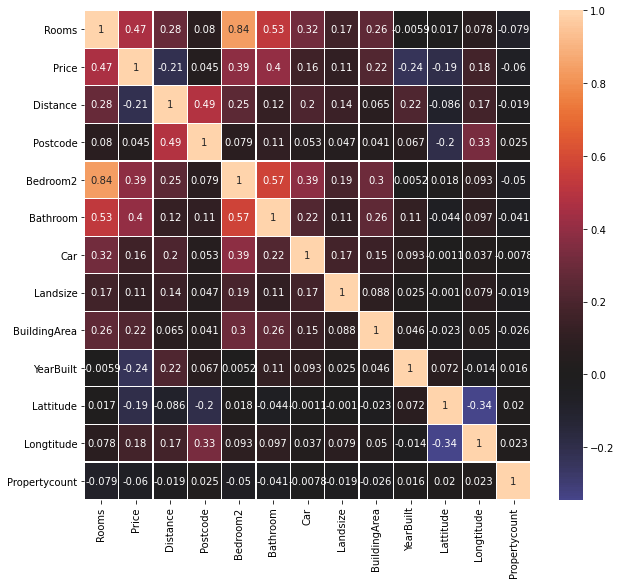

In [152]:
plt.figure(figsize=(10,9))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0,  annot= True, linewidths=0.1 )

Từ biểu đồ headmap ta thấy các sự tương quan mạnh của các feature với Price : Bathroom, bedroom2, Room,BuildingArea,YearBuilt

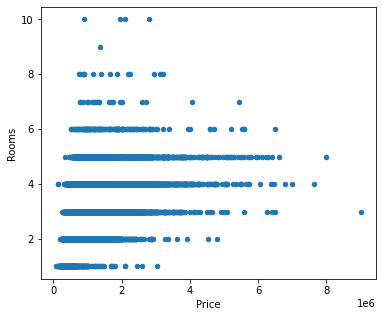

In [153]:
df.plot(y='Rooms',x='Price',kind='scatter',figsize=(6,5))

Từ 4-6 phòng giá tương đối cao.

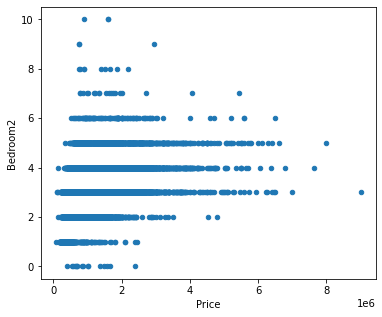

In [154]:
df.plot(y='Bedroom2',x='Price',kind='scatter',figsize=(6,5))

Từ 3-6 phòng bedroom2 giá tương đối cao.

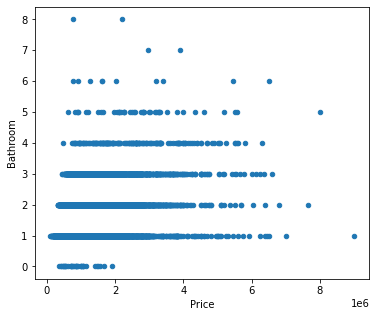

In [155]:
df.plot(y='Bathroom',x='Price',kind='scatter',figsize=(6,5))

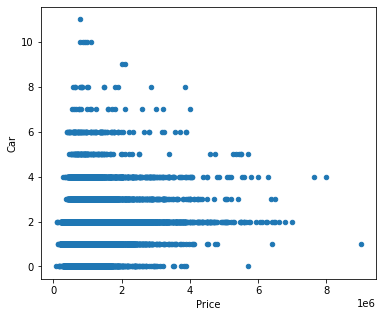

In [156]:
df.plot(y='Car',x='Price',kind='scatter',figsize=(6,5))

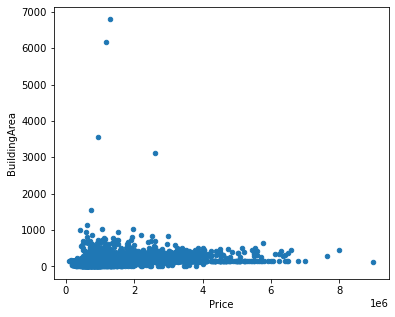

In [157]:
df.plot(y='BuildingArea',x='Price',kind='scatter',figsize=(6,5))

Ta thấy các mối tương quan mạnh và tích cực đối với giá

In [158]:

to_drop = ['Suburb','Address','Type','Method','SellerG','Date','Postcode','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount']
df.drop(to_drop,inplace = True , axis = 1)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,152.655748,1970.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.000000,1900.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.000000,1900.0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,152.655748,1970.0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.000000,2014.0


Ta xóa đi các cột không có độ tương quan mạnh 

In [159]:
column_names = df.columns
column_names

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt'],
      dtype='object')

In [160]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,1480000.0,2.5,2.0,1.0,1.0,202.000000,152.655748,1970.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.000000,79.000000,1900.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.000000,150.000000,1900.0
5,3,850000.0,2.5,3.0,2.0,1.0,94.000000,152.655748,1970.0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.000000,142.000000,2014.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.000000,152.655748,1970.0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.000000,104.000000,2018.0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.000000,120.000000,2000.0
34855,3,1140000.0,6.3,3.0,1.0,2.0,507.678948,152.655748,1970.0


In [161]:
df.shape

(27201, 9)

Ta có 11 feature và 27201 hàng dữ liệu.


# 2. Apply the model for prediction with holdout and cross validation

In [162]:
y = df['Price']
y.shape

(27201,)

Gía trị dự đoán là giá

In [163]:
X = df.drop(axis=1,columns=['Price'])
X

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2,2.5,2.0,1.0,1.0,202.000000,152.655748,1970.0
2,2,2.5,2.0,1.0,0.0,156.000000,79.000000,1900.0
4,3,2.5,3.0,2.0,0.0,134.000000,150.000000,1900.0
5,3,2.5,3.0,2.0,1.0,94.000000,152.655748,1970.0
6,4,2.5,3.0,1.0,2.0,120.000000,142.000000,2014.0
...,...,...,...,...,...,...,...,...
34852,4,6.3,4.0,1.0,3.0,593.000000,152.655748,1970.0
34853,2,6.3,2.0,2.0,1.0,98.000000,104.000000,2018.0
34854,2,6.3,2.0,1.0,2.0,220.000000,120.000000,2000.0
34855,3,6.3,3.0,1.0,2.0,507.678948,152.655748,1970.0


ta có dữ liệu gồm 10 feature

# 2.1 Holdout

In [192]:
XTrainHoldout, XTestHoldout, yTrainHoldout, yTestHoldout = train_test_split(X, y, test_size = 0.2, random_state = 10)
XTrainHoldout

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
4213,2,1.6,2.0,2.0,2.0,0.000000,105.000000,2000.0
30431,4,13.8,4.0,2.0,2.0,804.000000,225.000000,1915.0
24665,4,12.0,4.0,3.0,4.0,926.000000,152.655748,1970.0
32214,1,4.1,3.0,1.0,2.0,507.678948,152.655748,1970.0
23711,3,14.8,3.0,2.0,2.0,279.000000,152.655748,1970.0
...,...,...,...,...,...,...,...,...
12047,5,9.3,5.0,2.0,1.0,521.000000,208.000000,1915.0
9416,4,1.2,4.0,3.0,1.0,0.000000,176.000000,2000.0
22758,2,1.9,2.0,1.0,2.0,507.678948,152.655748,1970.0
9418,2,1.2,3.0,1.0,2.0,507.678948,152.655748,1970.0


In [195]:

LRHoldout = LinearRegression()


LRHoldout.fit(XTrainHoldout, yTrainHoldout)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
Price_Holdout_Train_Predict = pd.Series(LRHoldout.predict(XTrainHoldout))
Price_Holdout_Test_Predict  = pd.Series(LRHoldout.predict(XTestHoldout))

Price_Holdout_Test_Predict

0       1.235892e+06
1       5.951161e+05
2       6.555843e+05
3       6.328602e+05
4       1.152935e+06
            ...     
5436    1.091648e+06
5437    1.196616e+06
5438    7.502042e+05
5439    1.314161e+06
5440    5.397226e+05
Length: 5441, dtype: float64

In [197]:
print("Train RMSE:%.4f"%np.sqrt(metrics.mean_squared_error(yTrainHoldout,Price_Holdout_Train_Predict )))
print("Test RMSE :%.4f"%np.sqrt(metrics.mean_squared_error(yTestHoldout, Price_Holdout_Test_Predict)))

Train RMSE:489302.0973
Test RMSE :461752.2954


Train RMSE > Test RMSE : không có overfiting

<a id=cau4> </a>
#  Visualize the residue and homoscedasticity

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


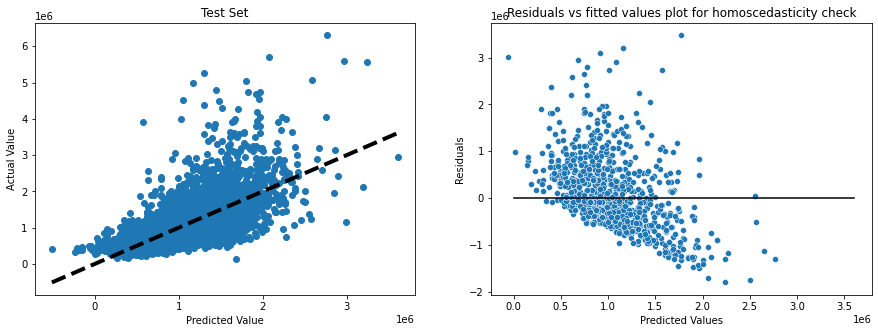

In [212]:
def Res_Homo_Vis(Predicted,Actual,listTitle):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(Predicted, Actual)
    ax[0].plot([Predicted.min(), Predicted.max()], [Predicted.min(), Predicted.max()], 'k--', lw=4)
    ax[0].set_xlabel('Predicted Value')
    ax[0].set_ylabel('Actual Value')
    ax[0].set_title(listTitle[0])
    
    residuals = Actual - Predicted

    p=sns.scatterplot(Predicted,residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    p = sns.lineplot([0,Predicted.max()],[0,0],color='black')

    p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Res_Homo_Vis(Price_Holdout_Test_Predict,yTestHoldout,['Test Set'])

### Prediction with Cross Validation.

In [213]:
LR_CV = LinearRegression()

In [214]:

CV_MSE = cross_val_score(LR_CV, X, y, scoring='neg_mean_squared_error', cv=10)
CV_Score_Run_Time = str(1000*(tock - tick))
print('Run Time ' + CV_Score_Run_Time + ' ms')
print('Test RMSE: ', np.sqrt(CV_MSE.mean() * -1))

Run Time 3.948211669921875 ms
Test RMSE:  486602.84946993244


In [215]:
np.sqrt(CV_MSE*-1)

array([552781.89163142, 515951.67064198, 444541.81290756, 465392.85800576,
       503661.40185145, 476146.64714273, 432871.33915042, 513718.09488561,
       472117.63269718, 476730.6111298 ])

Test RMSE CV > Test RMSE HOLDOUT.

## USING PCA, APPLY THE MODEL WITH HOLDOUT AND CROSS VALIDATION

###  PCA Prediction with Holdout

In [216]:
pca = PCA(n_components=4)
X_PCA = pd.DataFrame(pca.fit_transform(X))
X_PCA

,0,1,2,3
0,-305.651805,5.168476,-1.373232,-8.300362
1,-352.994140,-68.712898,67.325935,-3.595475
2,-373.786025,2.649209,68.355958,-3.746080
3,-413.635007,7.011006,-1.515822,-8.003929
4,-387.756292,-3.436524,-45.550294,-10.698332
...,...,...,...,...
27196,85.300945,-1.443001,-1.103124,-5.131230
27197,-410.384775,-40.984685,-50.375867,-7.090401
27198,-288.156896,-27.326113,-32.014950,-6.268049
27199,-0.008601,-0.000581,-1.212484,-5.046957


In [217]:
X_PCA.describe()

,0,1,2,3
count,2.720100e+04,2.720100e+04,2.720100e+04,2.720100e+04
mean,-5.884749e-14,-2.674886e-15,-1.109660e-14,5.684133e-16
std,4.400965e+02,8.152017e+01,2.454544e+01,6.521228e+00
min,-5.103218e+02,-2.381158e+02,-5.093204e+01,-2.901107e+01
25%,-1.573339e+02,-6.557766e+00,-2.289134e+00,-4.095540e+00
50%,4.986270e-04,2.353369e-03,-1.510710e+00,-7.769233e-01
75%,8.330595e+01,2.845717e+00,-1.014098e+00,2.626868e+00
max,9.329000e+03,6.632751e+03,7.705598e+02,5.050477e+01


In [218]:
X_PCATrainHoldout, X_PCATestHoldout, y_PCATrainHoldout, y_PCATestHoldout = train_test_split(X_PCA, y, test_size = 0.2, random_state = 10)

In [219]:

LR_PCA_Holdout = LinearRegression()

LR_PCA_Holdout.fit(X_PCATrainHoldout, y_PCATrainHoldout)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
Price_PCAHoldout_Train_Predict = pd.Series(LR_PCA_Holdout.predict(X_PCATrainHoldout))
Price_PCAHoldout_Test_Predict  = pd.Series(LR_PCA_Holdout.predict(X_PCATestHoldout))

In [221]:
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_PCATrainHoldout,Price_PCAHoldout_Train_Predict )))
print('Test RMSE :', np.sqrt(metrics.mean_squared_error(y_PCATestHoldout, Price_PCAHoldout_Test_Predict)))

Train RMSE: 593846.2462788856
Test RMSE : 557616.4921668426


Train RMSE>Test RMSE: Không có overfiting.
Nghịch lý : Dùng PCA sai số hơn không dùng PCA.

<a id=cau4> </a>
#  Visualize the residue and homoscedasticity

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


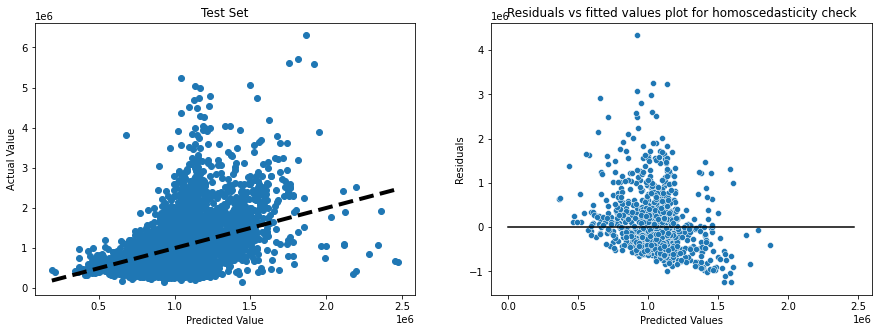

In [222]:
Res_Homo_Vis(Price_PCAHoldout_Test_Predict,y_PCATestHoldout,['Test Set'])

###  PCA Prediction with Cross Validation

In [229]:
LR_PCA_CV = LinearRegression()

In [230]:

PCA_CV_MSE = cross_val_score(LR_PCA_CV, X_PCA_Normalized, y, scoring='neg_mean_squared_error', cv=5)



print('Test RMSE: ', np.sqrt(PCA_CV_MSE.mean() * -1))

Test RMSE:  595279.8440162963


In [231]:
np.sqrt(PCA_CV_MSE*-1)

array([694017.46200624, 553963.40430223, 568874.32549499, 566669.19469957,
       581827.12050556])

<a id=cau5> </a>
# 5. Tune the model if necessary

<a id=cau6> </a>
# 6. Write up analysis for each section (For example: explain why the model is overfitting, explain why applying PCA is better, etc.

Không biết sai ở đâu nhưng :
Dùng PCA kết quả sai số lại cao hơn không dùng
Giống nhau khi dùng PCA vì cả hai đều không có overfiting .
Biểu đồ dự đoán tương đối



<a id=cau7> </a>
# 7. Include conclusions for summary

In [ ]:
Sẽ xem lại review và chỉnh lại bài.